# ML using PyTorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It is free and open-source software released under the Modified BSD license

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation. If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

Go through the following link to learn the basics of Tensors in Pytorch:
https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html

## Linear Regression Using Pytorch

In [9]:
from numpy import loadtxt
import numpy as np
import torch
from torch import nn
from torchvision import transforms
import torch.optim as optim


# Load the datasets
np_data = loadtxt('ex1data1 (1).txt', delimiter=',')

# convert np array to pytorch tensor
X = torch.from_numpy((np_data[:,np.newaxis,0]).astype('float32'))
Y = torch.from_numpy(np_data[:,np.newaxis,1].astype('float32'))

# Linear regression hypothesis using Pytorch
hypothesis = nn.Linear(X.shape[1], 1, bias=True) # h = w x + b

optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

J_history = []
for iterations in range(200):
    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X)
    
    loss = Cost(out, Y)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]
    


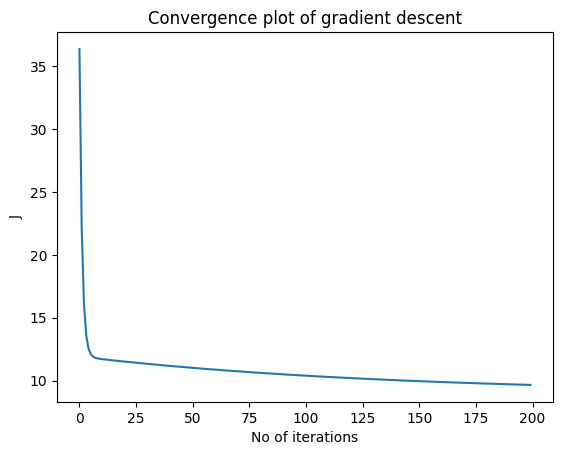

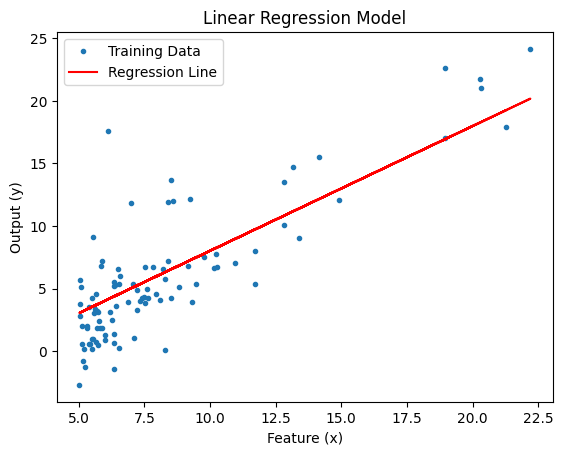

In [10]:
# plot the results
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()

plt.plot(X,Y,'.')
plt.plot(X[:, 0], out.detach().numpy(), c = 'r')
plt.title('Linear Regression Model')
plt.xlabel('Feature (x)')
plt.ylabel('Output (y)')
plt.legend(['Training Data', 'Regression Line'])
plt.show()

## Multiclass Logistic Regression using Pytorch (softmax classification)

Reading assignment: Go through the following

1. https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
<br>
2. https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html
<br>
3. https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

Mini batch gradient descent:

 https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

In [11]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder

# Load the classification dataset Iris
np_data = datasets.load_iris()

# convert np array to pytorch tensor
X = torch.from_numpy((np_data.data).astype('float32'))
Y = torch.from_numpy((np_data.target.astype('int64')))


# Logistic regression hypothesis using Pytorch
hypothesis = nn.Sequential(
    nn.Linear(X.shape[1], 3, bias=True), 
    nn.LogSoftmax(dim=1)) 
    
optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.NLLLoss() # Negative log likelihood loss

J_history = []
for iterations in range(200):
    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X)
    
    loss = Cost(out, Y)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]
    


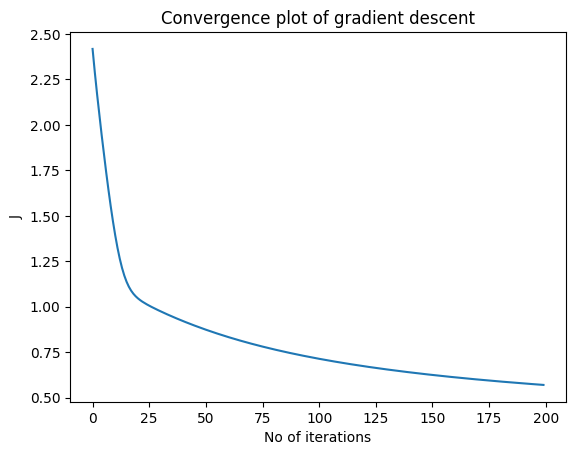

In [12]:
# plot the results
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()

# Lab Task
## Logistic Regression on MNIST Handwritten Digit 
Apply logistic regression to mnist handwritten digits. Use the code in the previous cell as the starter code. There are 10 classes so the number of out_feature in nn.Linear will be 10. Set the in_features according to the dimension of vectorised image. Plot the convergence plot of gradiet descent.

Note: Do not use convolution or Deep neural network. Use vectorised image as input. Use multiclass logistic regression model as implemented in the previous cell. 

### 1. Load the MNIST data
Follow the guidelines here to download and use MNIST hand written digits dataset for the task
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html 

In [1]:
# use the following imports to download MNIST using Pytorch 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
#todo: 
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 102666977.59it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24546239.88it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26117316.01it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13444268.71it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### 2. Visualize the MNIST data


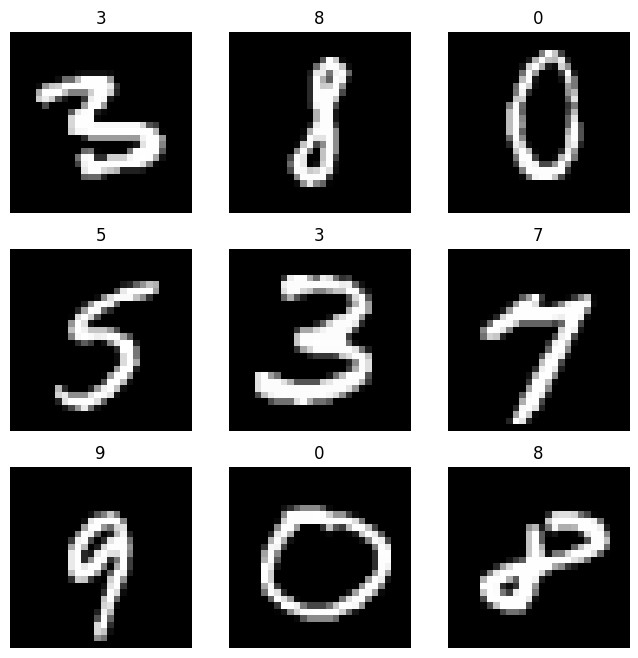

In [2]:
#todo
import matplotlib.pyplot as plt

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_trainset), size=(1,)).item()
    img, label = mnist_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 3.  Create a multiclass logistic regression (softmax) model and train

In [3]:
# Create softmax model. in_features = 28x28 and out_features = 10
from torch.autograd import Variable
# todo:
batch_size = 100
n_iters = 3000
epochs = n_iters / (len(mnist_trainset) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.01
#make the data iteratable
train_loader = torch.utils.data.DataLoader(dataset=mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_testset, batch_size=batch_size, shuffle=False)

#create a class that defines the architecture of Logistic Regression.
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

#initializing our model 
model = LogisticRegression(input_dim, output_dim)
#instantiate loss class
criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy
#Instatnitate the Optimizer Class
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

#train the model
iter = 0
J_history = []
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter+=1
        if iter%500==0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                # for gpu, bring the predicted and labels back to cpu fro python operations to work
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))
    J_history += [loss.item()]


#print loss and accuracy in each epoch

Iteration: 500. Loss: 0.7243372201919556. Accuracy: 84.66000366210938.
Iteration: 1000. Loss: 0.6062322854995728. Accuracy: 87.0.
Iteration: 1500. Loss: 0.5530626177787781. Accuracy: 88.04000091552734.
Iteration: 2000. Loss: 0.4708593487739563. Accuracy: 88.66999816894531.
Iteration: 2500. Loss: 0.542180597782135. Accuracy: 88.9800033569336.
Iteration: 3000. Loss: 0.4398112893104553. Accuracy: 89.30999755859375.


### 4. Plot Convergence plot of gradient descent with respect to no of epochs

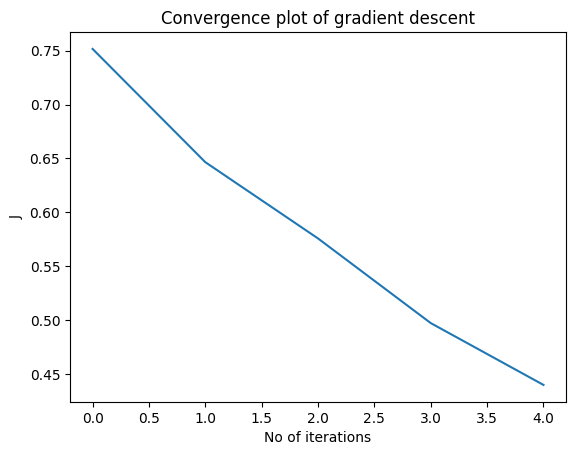

In [4]:
#todo
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()

### 5. Test on a batch of test images and display images with the predicted label

In [15]:
len(test_loader)

100

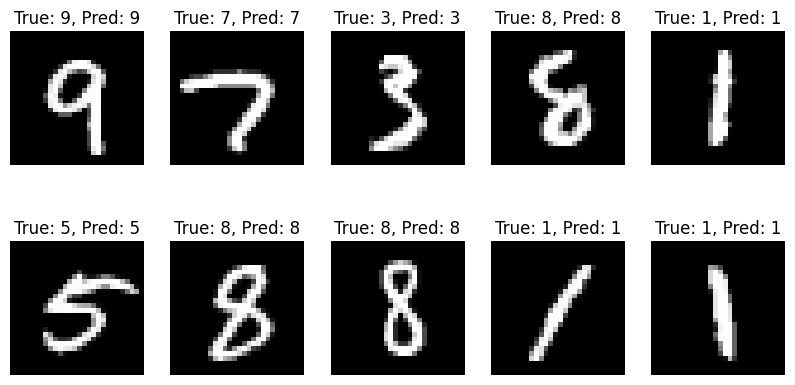

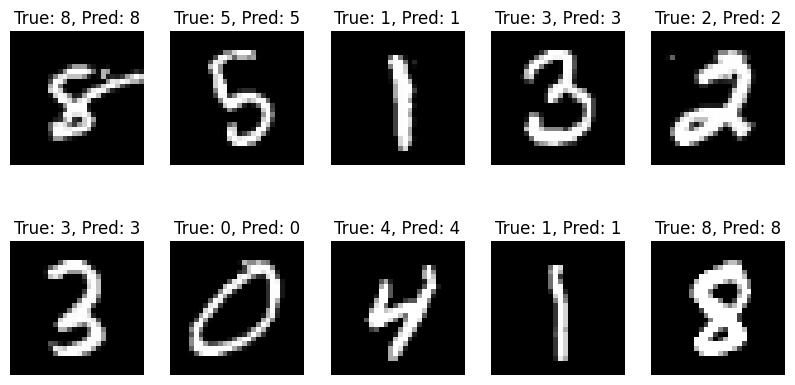

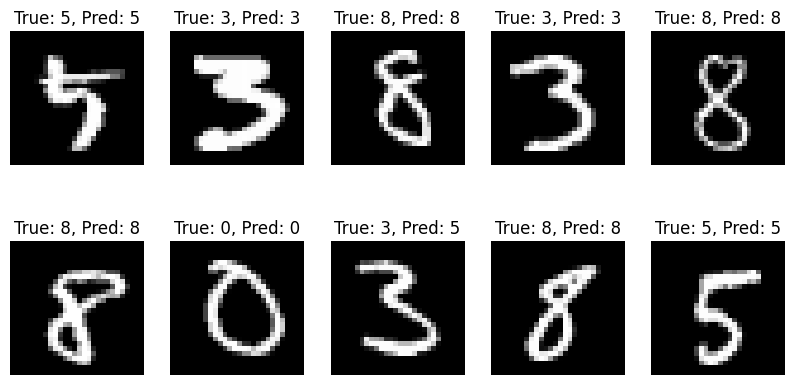

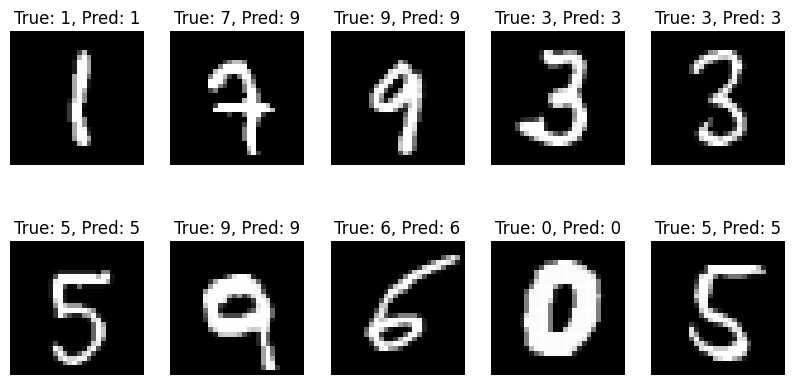

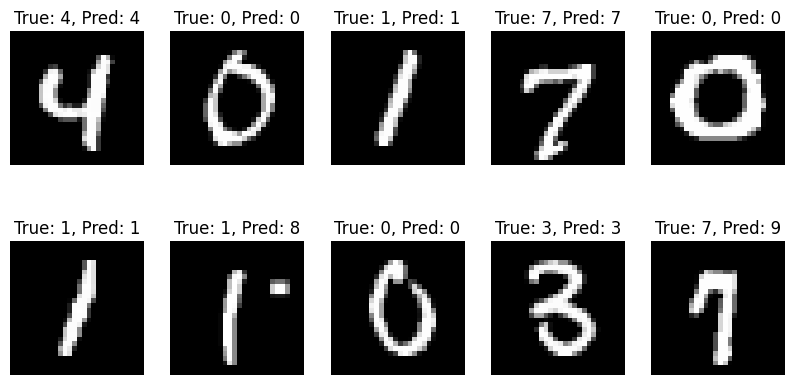

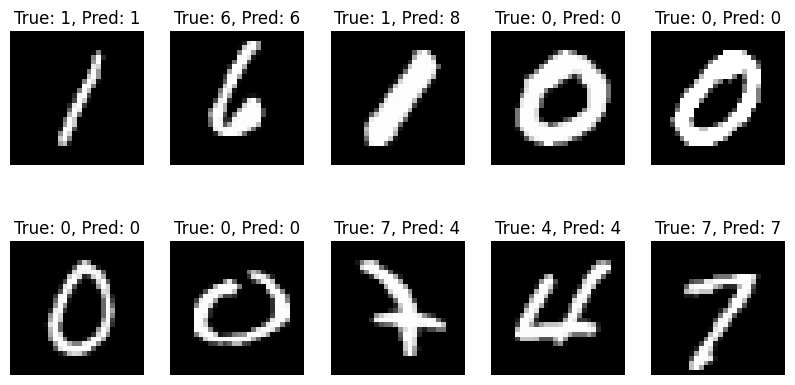

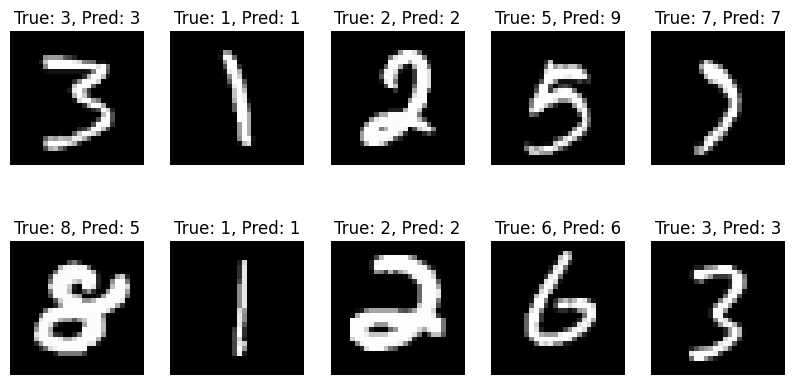

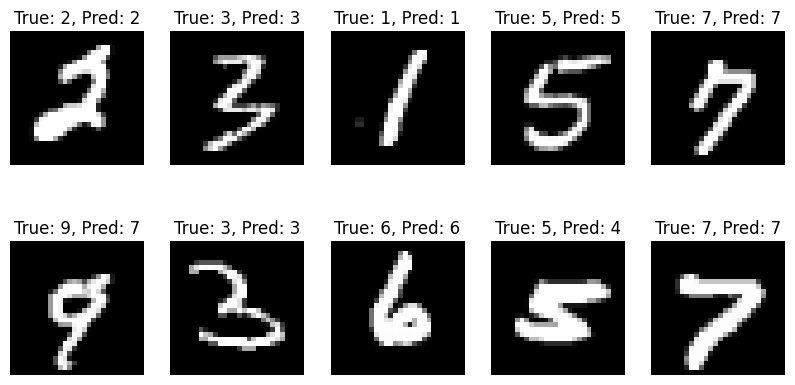

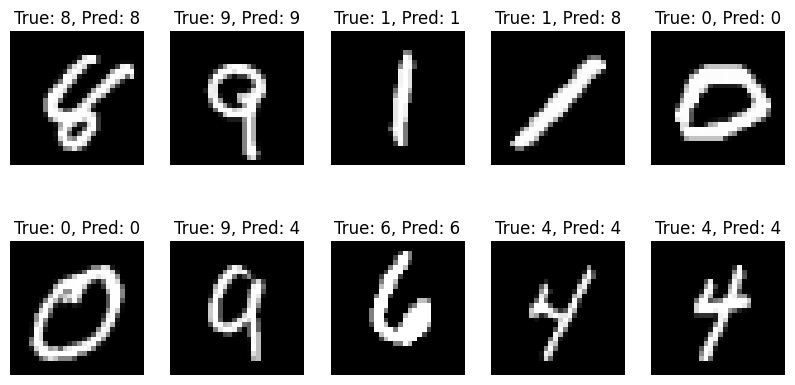

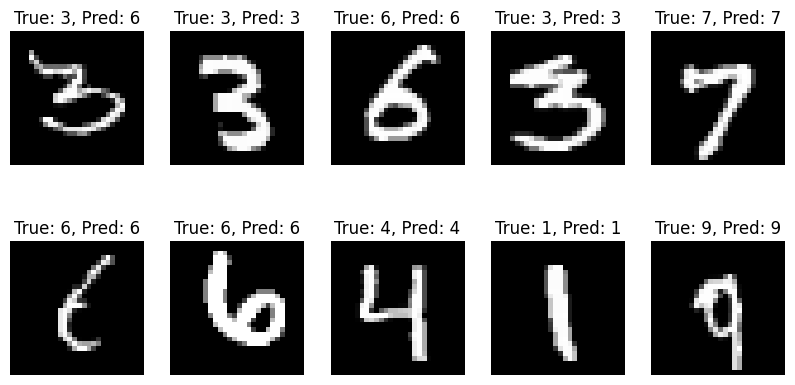

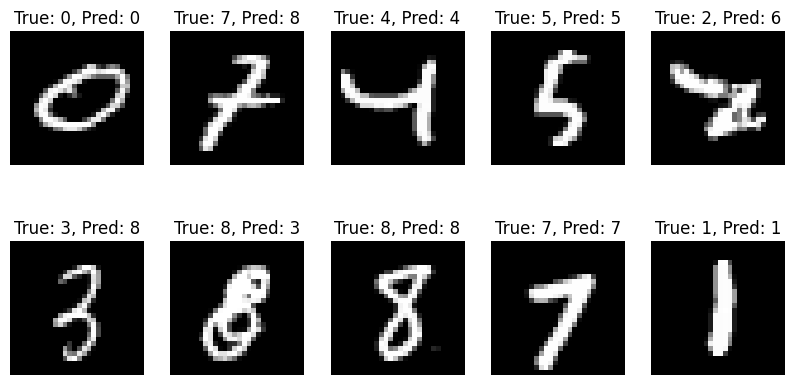

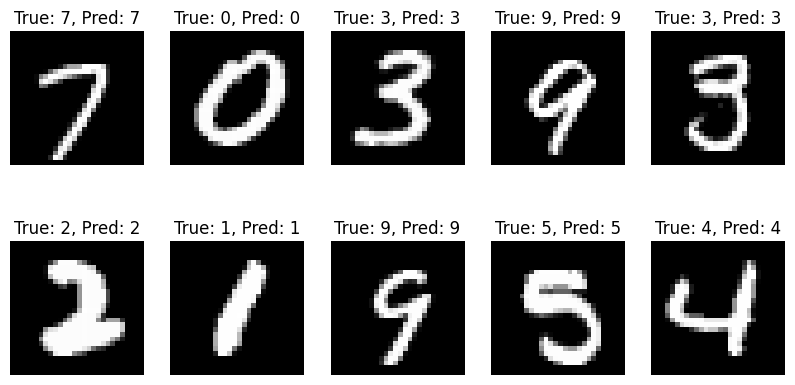

In [17]:
import matplotlib.pyplot as plt

# todo
# create a function to plot images with predicted labels
def plot_images(images, labels, predicted_labels):
    fig, axs = plt.subplots(2, 5, figsize=(10, 5))
    axs = axs.flatten()
    for i in range(10):
        axs[i].imshow(images[i].numpy().squeeze(), cmap='gray')
        axs[i].set_title(f"True: {labels[i]}, Pred: {predicted_labels[i]}")
        axs[i].axis('off')
    plt.show()

# set model to evaluation mode
model.eval()

# iterate over test_loader to get a batch of test images
for images, labels in test_loader:
  img = images
  images = Variable(images.view(-1, 28 * 28))
  labels = labels.numpy()
  # get predicted labels for the batch of test image 
  with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    predicted = predicted.numpy()
    # plot the images with the predicted labels
    plot_images(img, labels, predicted)


